<a href="https://colab.research.google.com/github/Riteshtaru343/-LetsGrowMore/blob/main/Music_Recommandation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")

In [12]:
data = pd.read_csv("/content/data.csv")
genre_data = pd.read_csv("/content/data_by_genres.csv")
year_data = pd.read_csv("/content/data_by_year.csv")
artist_data = pd.read_csv('/content/data_by_genres.csv')

In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54582 entries, 0 to 54581
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   valence           54582 non-null  float64
 1   year              54582 non-null  int64  
 2   acousticness      54582 non-null  float64
 3   artists           54581 non-null  object 
 4   danceability      54581 non-null  float64
 5   duration_ms       54581 non-null  float64
 6   energy            54581 non-null  float64
 7   explicit          54581 non-null  float64
 8   id                54581 non-null  object 
 9   instrumentalness  54581 non-null  float64
 10  key               54581 non-null  float64
 11  liveness          54581 non-null  float64
 12  loudness          54581 non-null  float64
 13  mode              54581 non-null  float64
 14  name              54581 non-null  object 
 15  popularity        54581 non-null  float64
 16  release_date      54581 non-null  object

In [7]:
print(genre_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB
None


In [32]:
print(year_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              100 non-null    int64  
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   danceability      100 non-null    float64
 4   duration_ms       100 non-null    float64
 5   energy            100 non-null    float64
 6   instrumentalness  100 non-null    float64
 7   liveness          100 non-null    float64
 8   loudness          100 non-null    float64
 9   speechiness       100 non-null    float64
 10  tempo             100 non-null    float64
 11  valence           100 non-null    float64
 12  popularity        100 non-null    float64
 13  key               100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB
None


In [13]:
print(artist_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB
None


In [ ]:
#Heat Map:- It is a graphical representation of data where values are depicted by color.

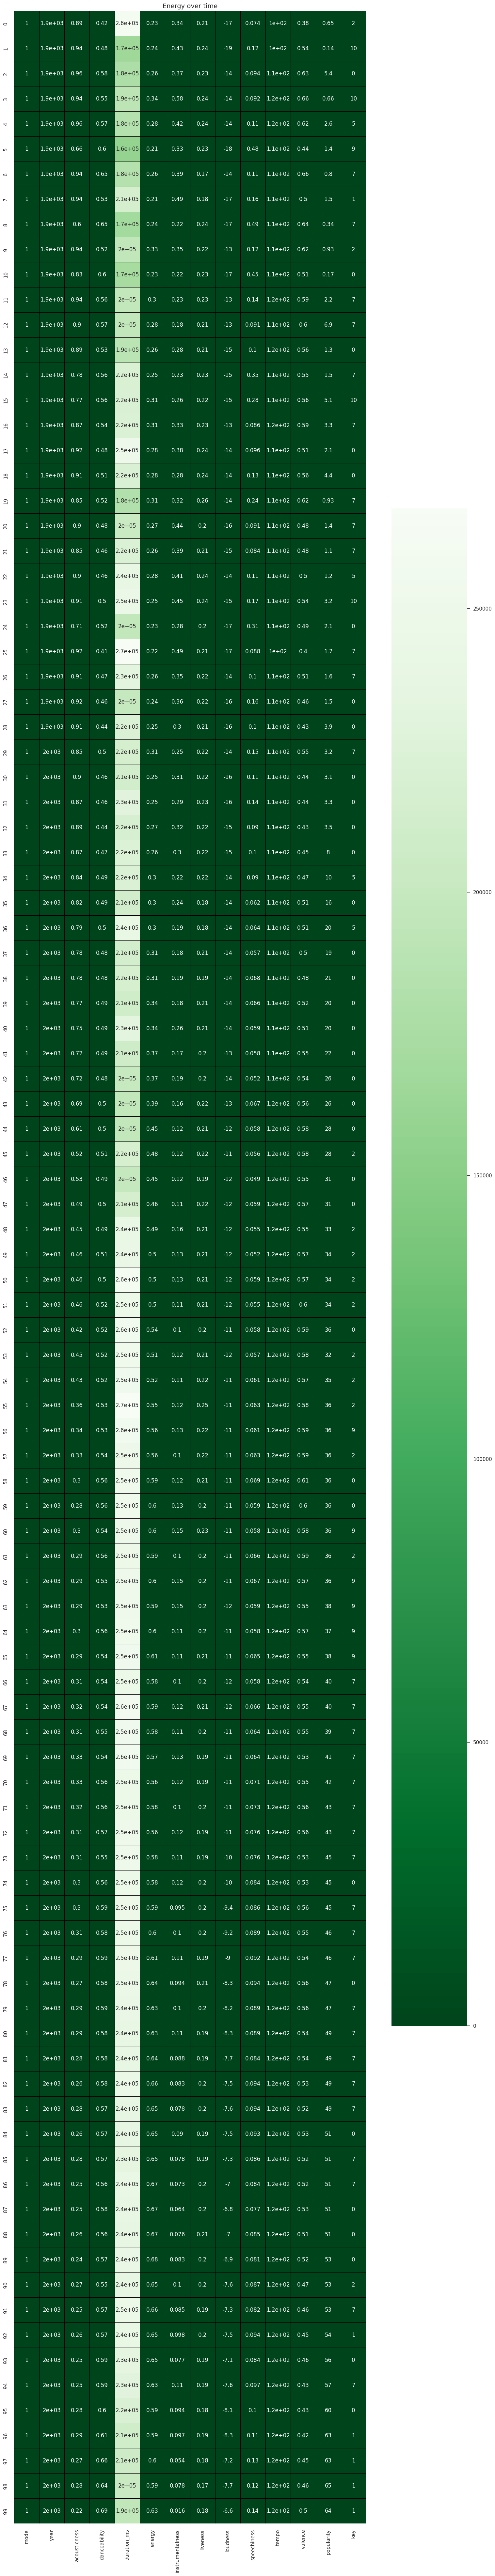

In [14]:
year_data.pivot('year','duration_ms','energy').head()
plt.figure(figsize=(20,100))
pivot_table = year_data.pivot('year','duration_ms','energy')
plt.xlabel('year', size = 14)
plt.ylabel('duration_ms', size = 14)
plt.title('Energy over time', size = 14)
sns.heatmap(year_data, annot=True, linewidths=.4,linecolor='black', square=True, cmap='Greens_r',cbar=True);

In [16]:
df = pd.read_csv('/content/dataset.csv')
corr=df.corr()
corr

,Unnamed: 0,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
Unnamed: 0,1.000000,0.032142,-0.032743,-0.054736,0.003444,-0.055994,-0.005520,-0.027307,0.005107,-0.084952,0.076840,-0.070286,0.033639,0.053111,-0.025824,-0.021115
popularity,0.032142,1.000000,-0.007101,0.044082,0.035448,0.001056,-0.003853,0.050423,-0.013931,-0.044927,-0.025472,-0.095139,-0.005387,-0.040534,0.013205,0.031073
duration_ms,-0.032743,-0.007101,1.000000,-0.065263,-0.073426,0.058523,0.008114,-0.003470,-0.035556,-0.062600,-0.103788,0.124371,0.010321,-0.154479,0.024346,0.018225
explicit,-0.054736,0.044082,-0.065263,1.000000,0.122507,0.096955,0.004484,0.108588,-0.037212,0.307952,-0.094403,-0.103404,0.032549,-0.003381,-0.002816,0.038386
danceability,0.003444,0.035448,-0.073426,0.122507,1.000000,0.134325,0.036469,0.259077,-0.069219,0.108626,-0.171533,-0.185606,-0.131617,0.477341,-0.050450,0.207218
energy,-0.055994,0.001056,0.058523,0.096955,0.134325,1.000000,0.048006,0.761690,-0.078362,0.142509,-0.733906,-0.181879,0.184796,0.258934,0.247851,0.187126
key,-0.005520,-0.003853,0.008114,0.004484,0.036469,0.048006,1.000000,0.038590,-0.135916,0.020418,-0.040937,-0.006823,-0.001600,0.034103,0.010917,0.015065
loudness,-0.027307,0.050423,-0.003470,0.108588,0.259077,0.761690,0.038590,1.000000,-0.041764,0.060826,-0.589803,-0.433477,0.076899,0.279848,0.212446,0.191992
mode,0.005107,-0.013931,-0.035556,-0.037212,-0.069219,-0.078362,-0.135916,-0.041764,1.000000,-0.046532,0.095553,-0.049955,0.014012,0.021953,0.000566,-0.024092
speechiness,-0.084952,-0.044927,-0.062600,0.307952,0.108626,0.142509,0.020418,0.060826,-0.046532,1.000000,-0.002186,-0.089616,0.205219,0.036635,0.017273,-0.000011


Text(0.5, 0.98, '')

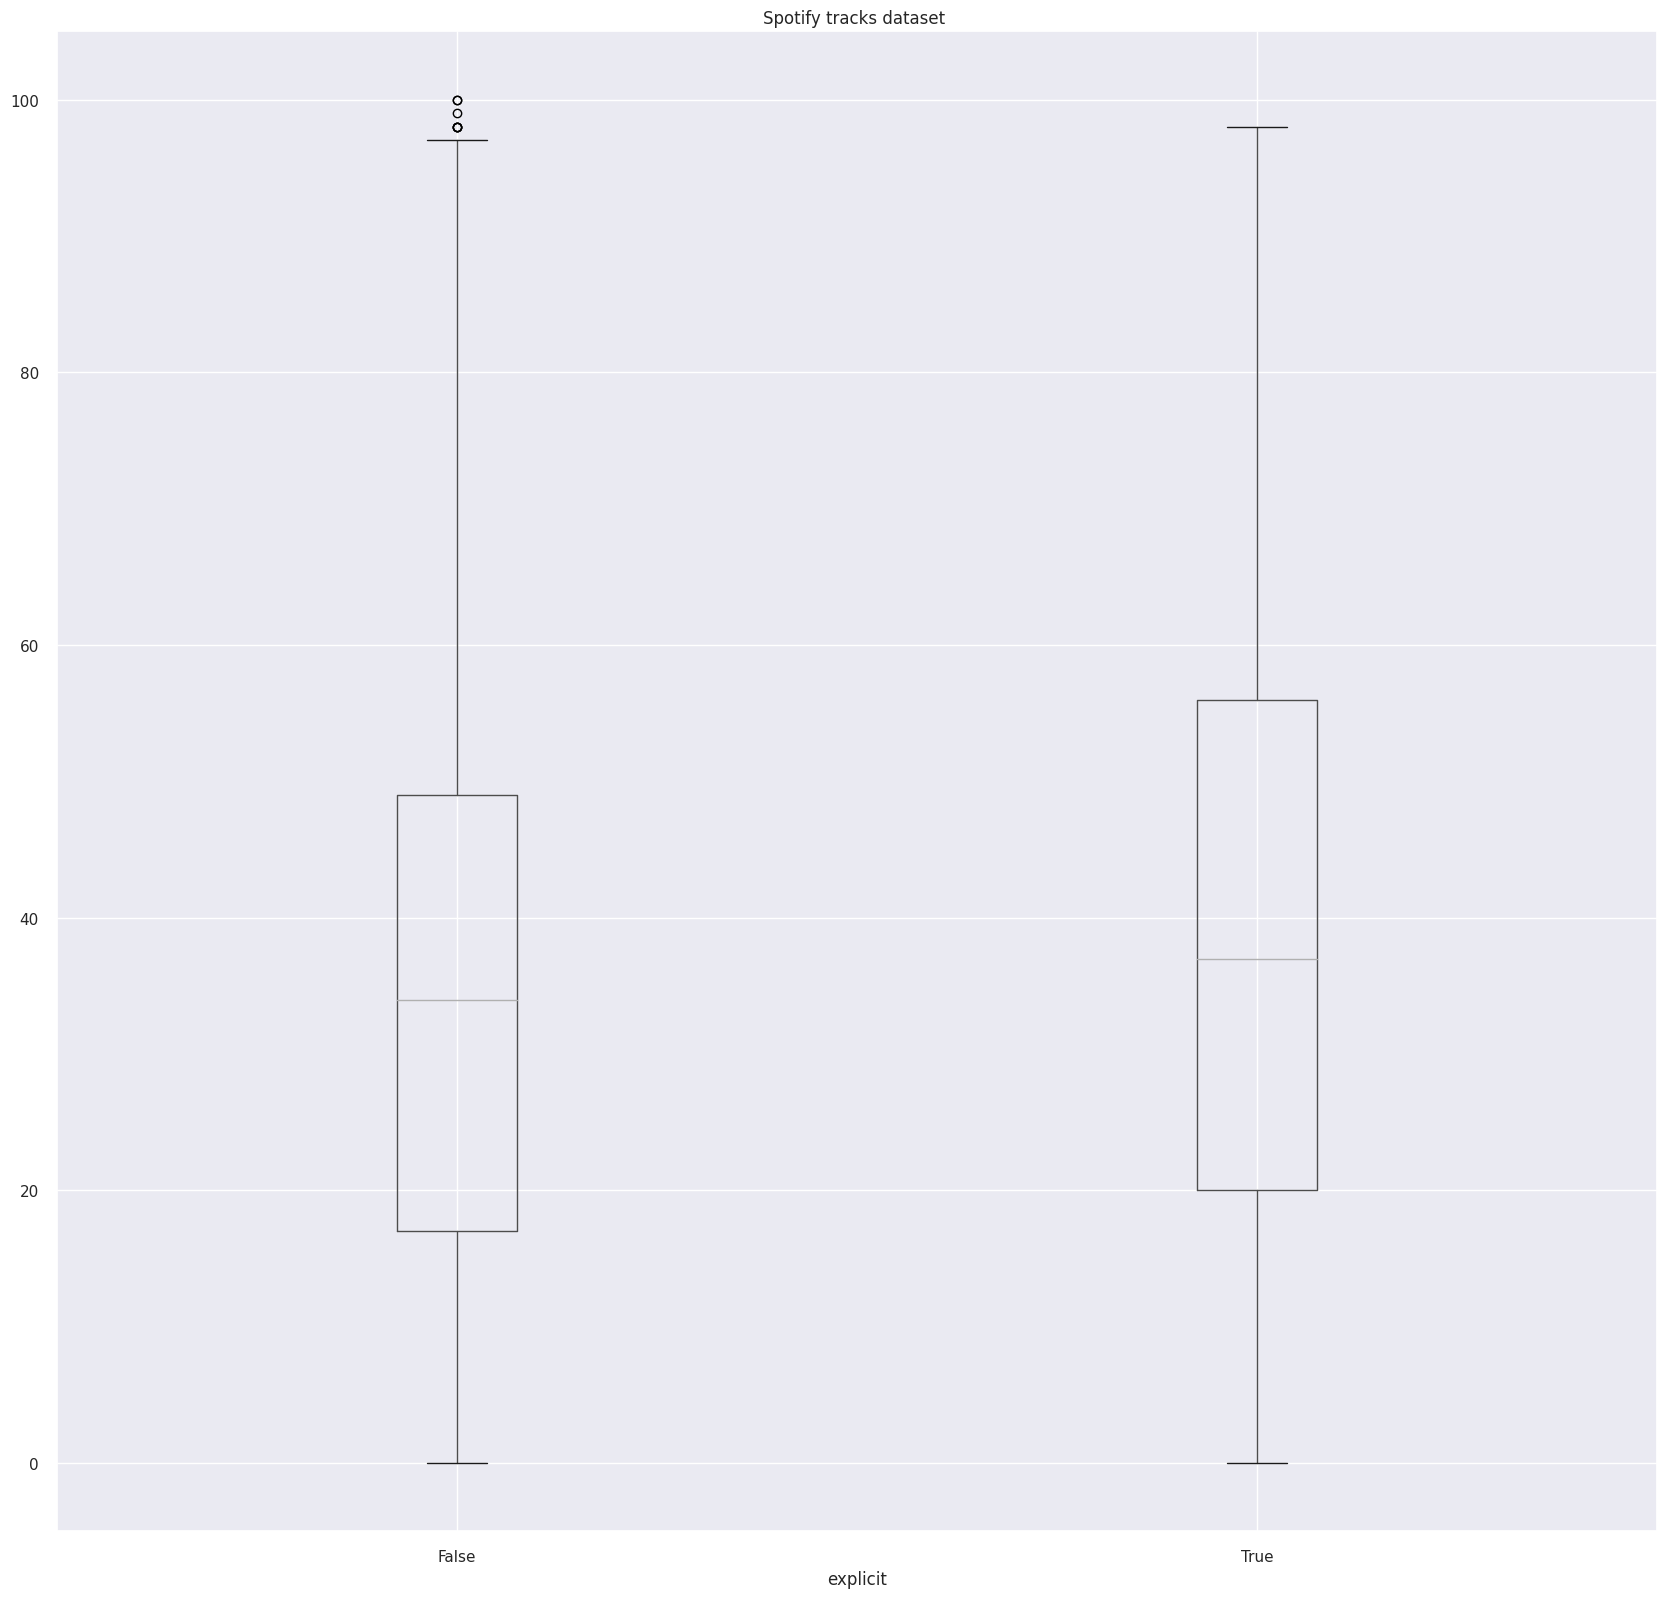

In [18]:
plot_df = pd.read_csv('/content/dataset.csv')
plot_df.head()
plot_df['explicit'].value_counts(dropna = False)
plot_df.boxplot(column='popularity', by ='explicit')
plt.title('Spotify tracks dataset ')
plt.suptitle('')

<Axes: xlabel='explicit', ylabel='popularity'>

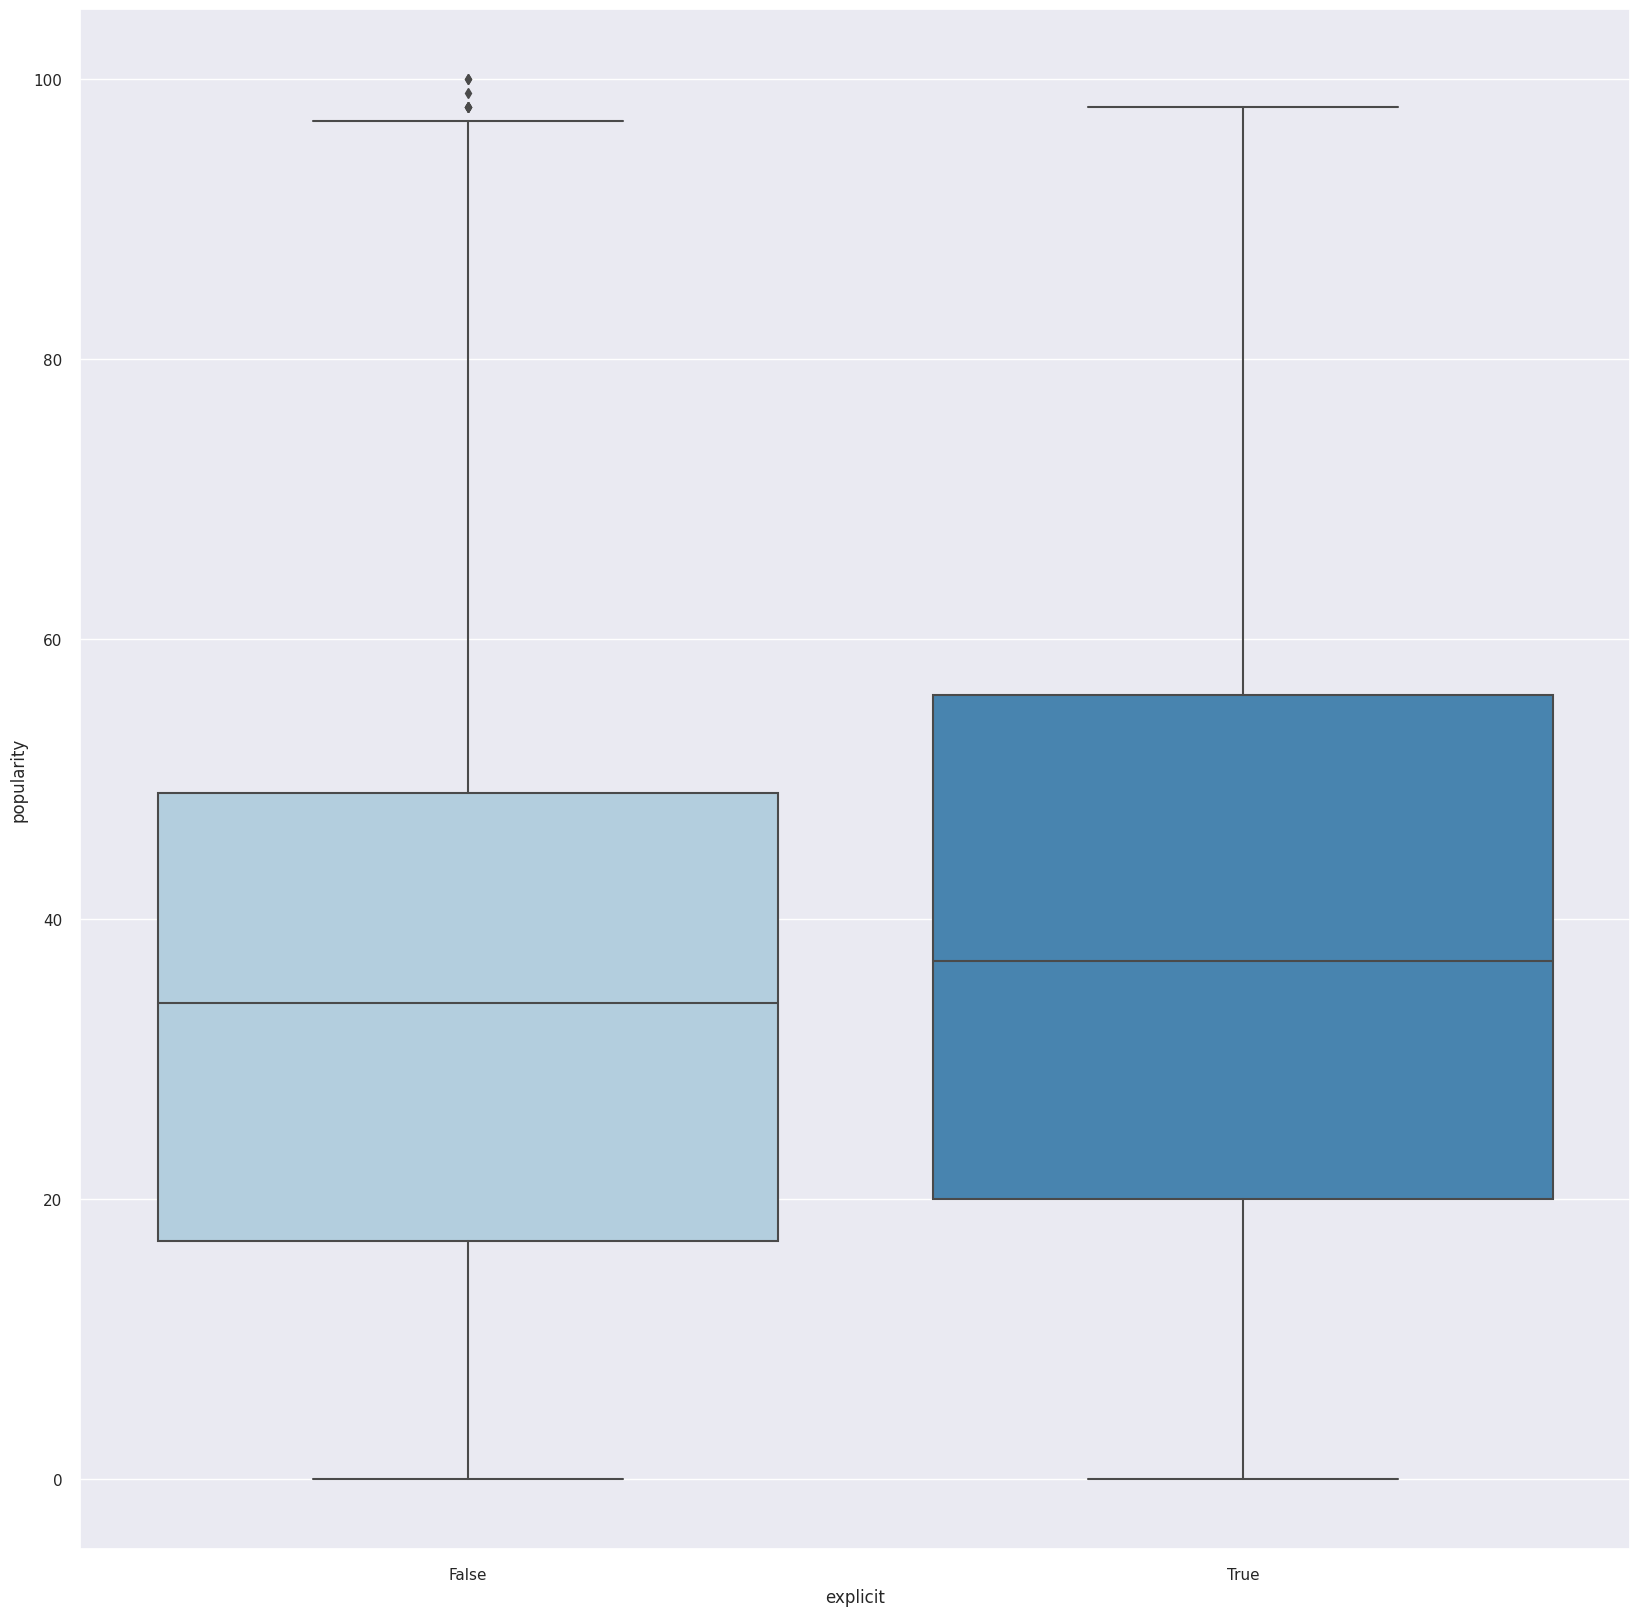

In [19]:
sns.boxplot(x='explicit', y='popularity', data=plot_df, palette='Blues' )

<Axes: xlabel='explicit', ylabel='popularity'>

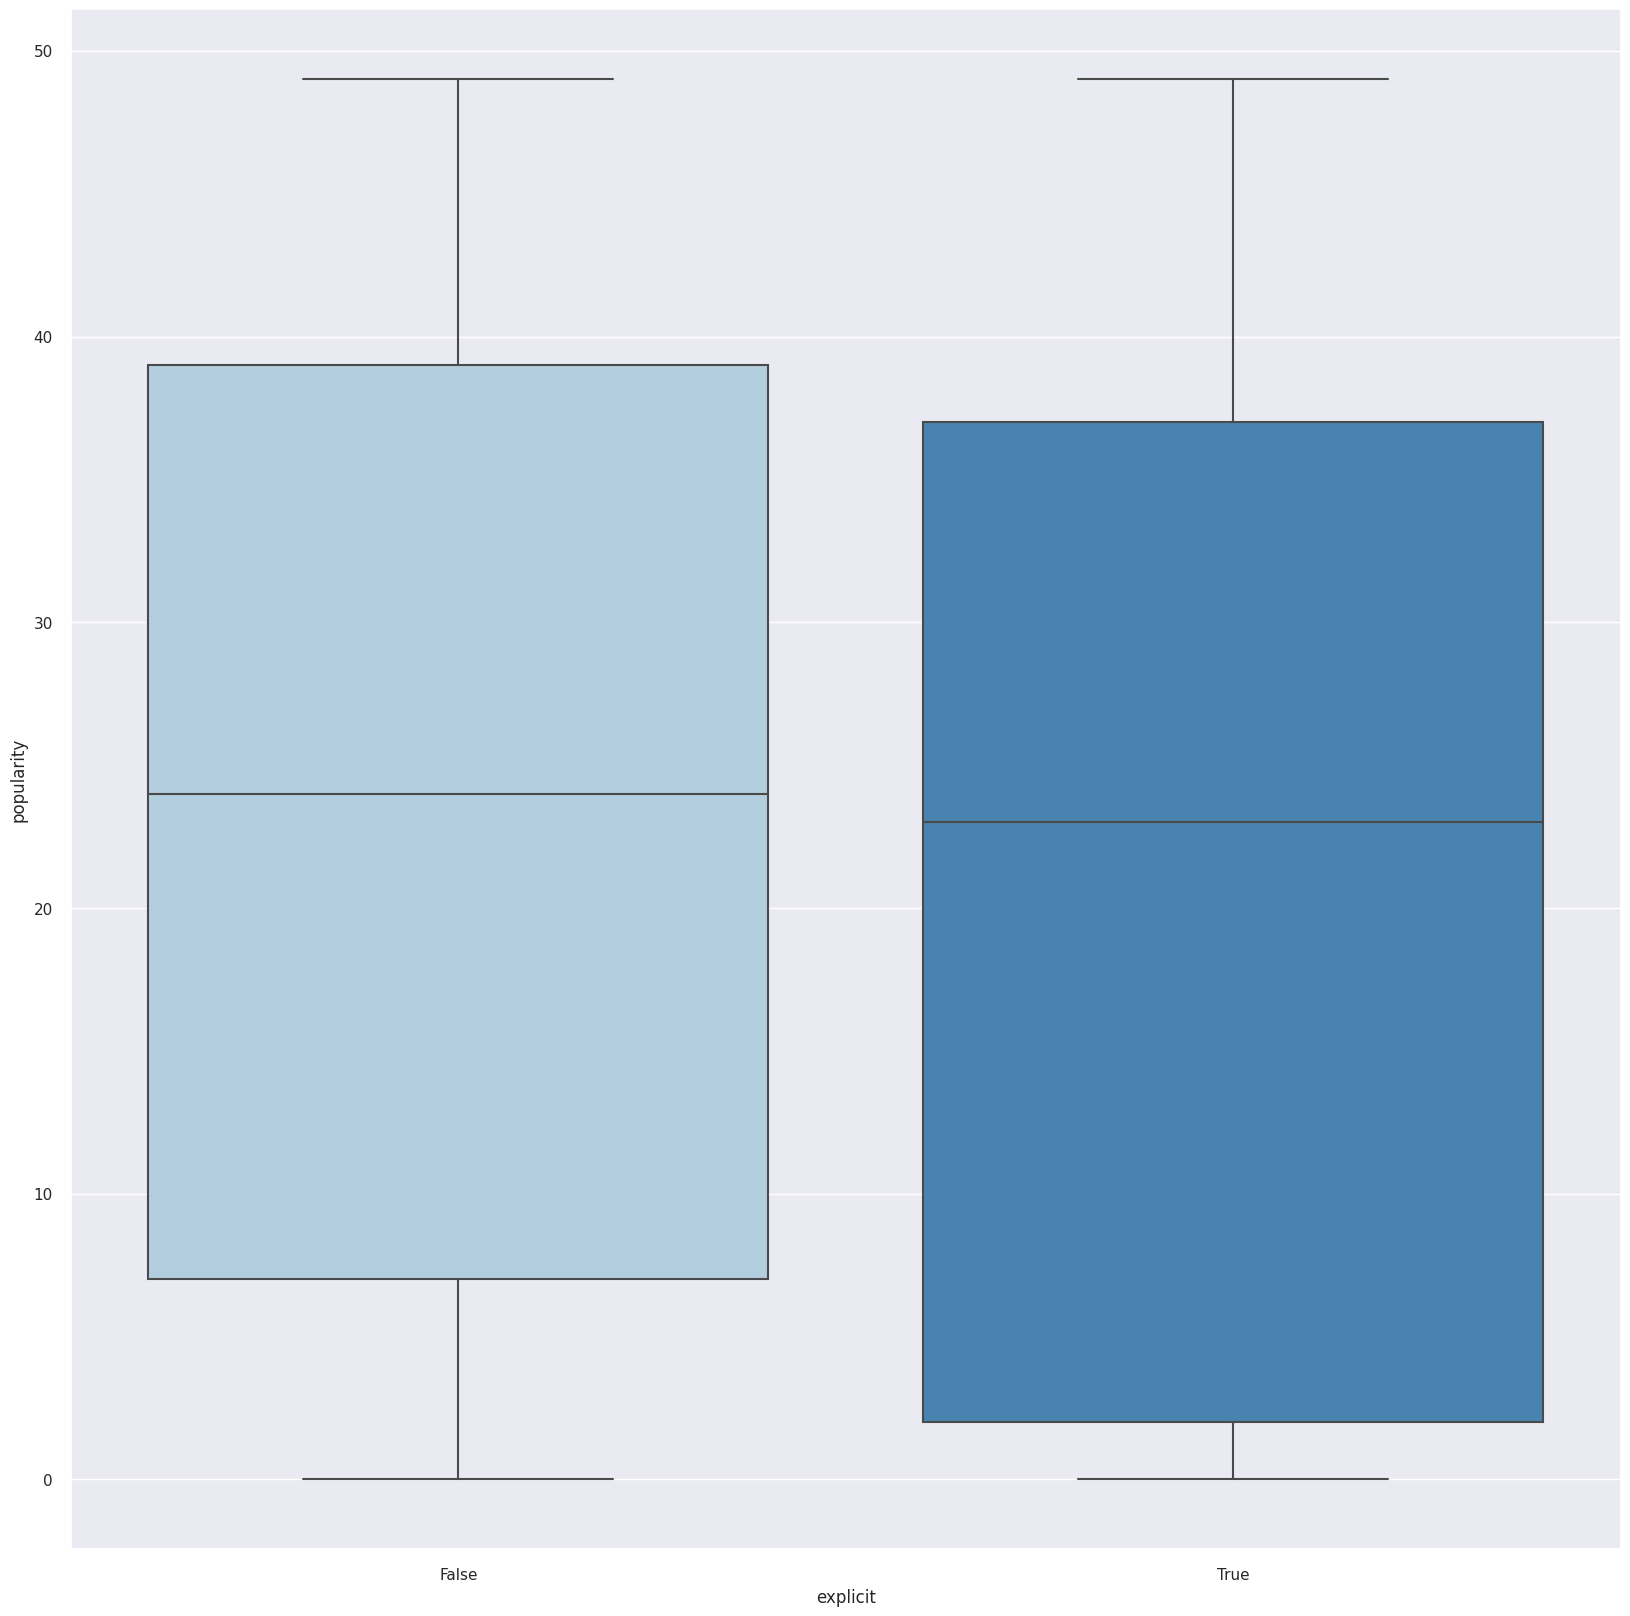

In [23]:
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 = 1.5 * IQR
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return ls
index_list = []
for feature in ['popularity']:
    index_list.extend(outliers(plot_df, feature))
def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df
cleaned_df = remove(plot_df, index_list)
sns.boxplot(x='explicit', y='popularity', data = cleaned_df, palette='Blues')

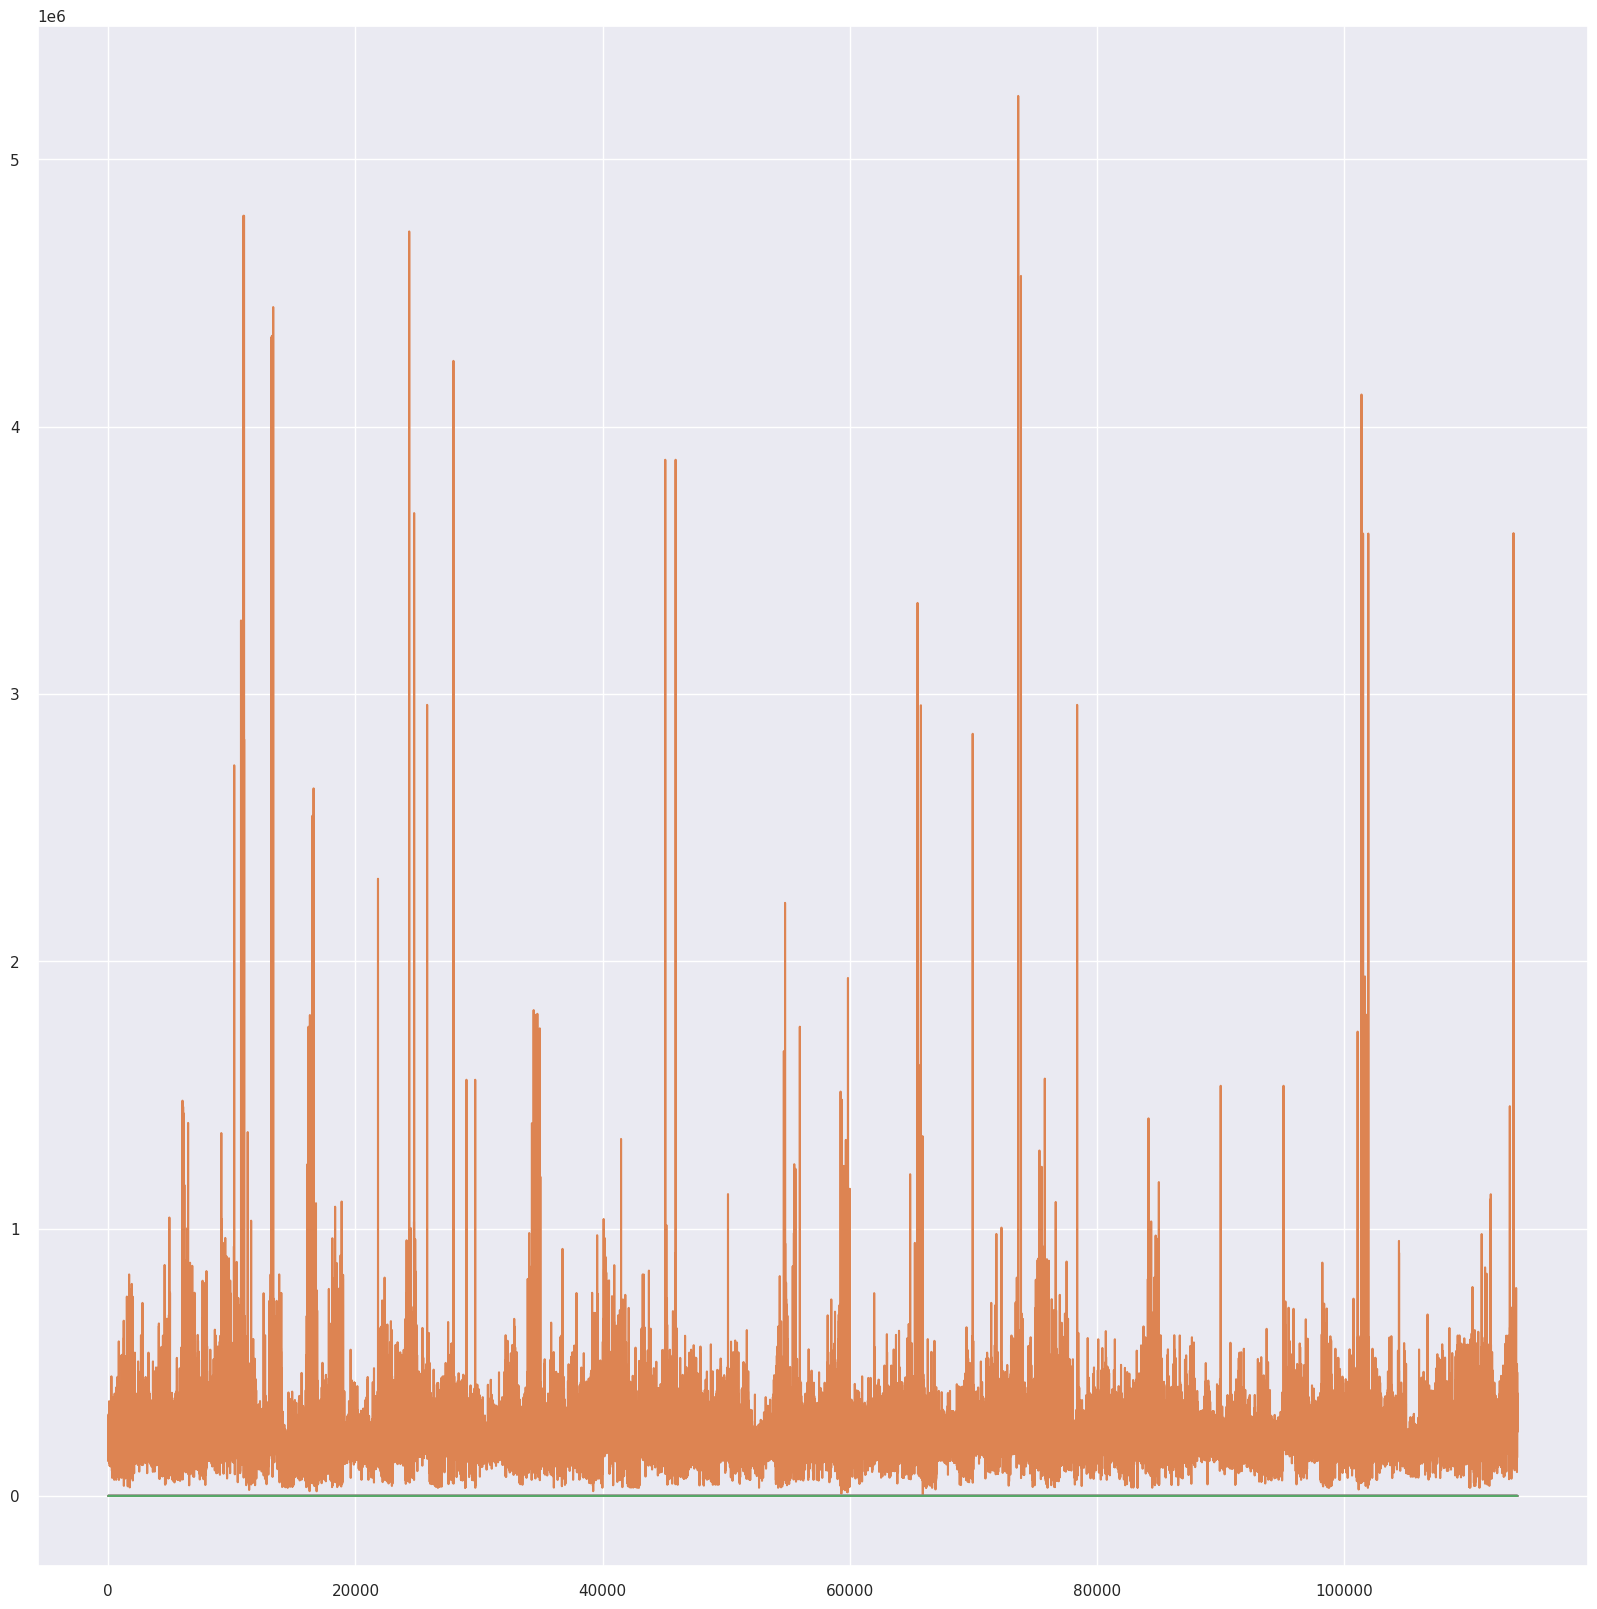

<Figure size 1000x1000 with 0 Axes>

In [25]:
data = pd.read_csv('/content/dataset.csv')
data.head()
data.columns
data = data[['popularity','duration_ms','danceability', 'energy',
       'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']]
data.head()
mean = np.mean(data)
std = np.std(data)
plt.plot(data)
plt.figure(figsize=(10,10))
plt.show()

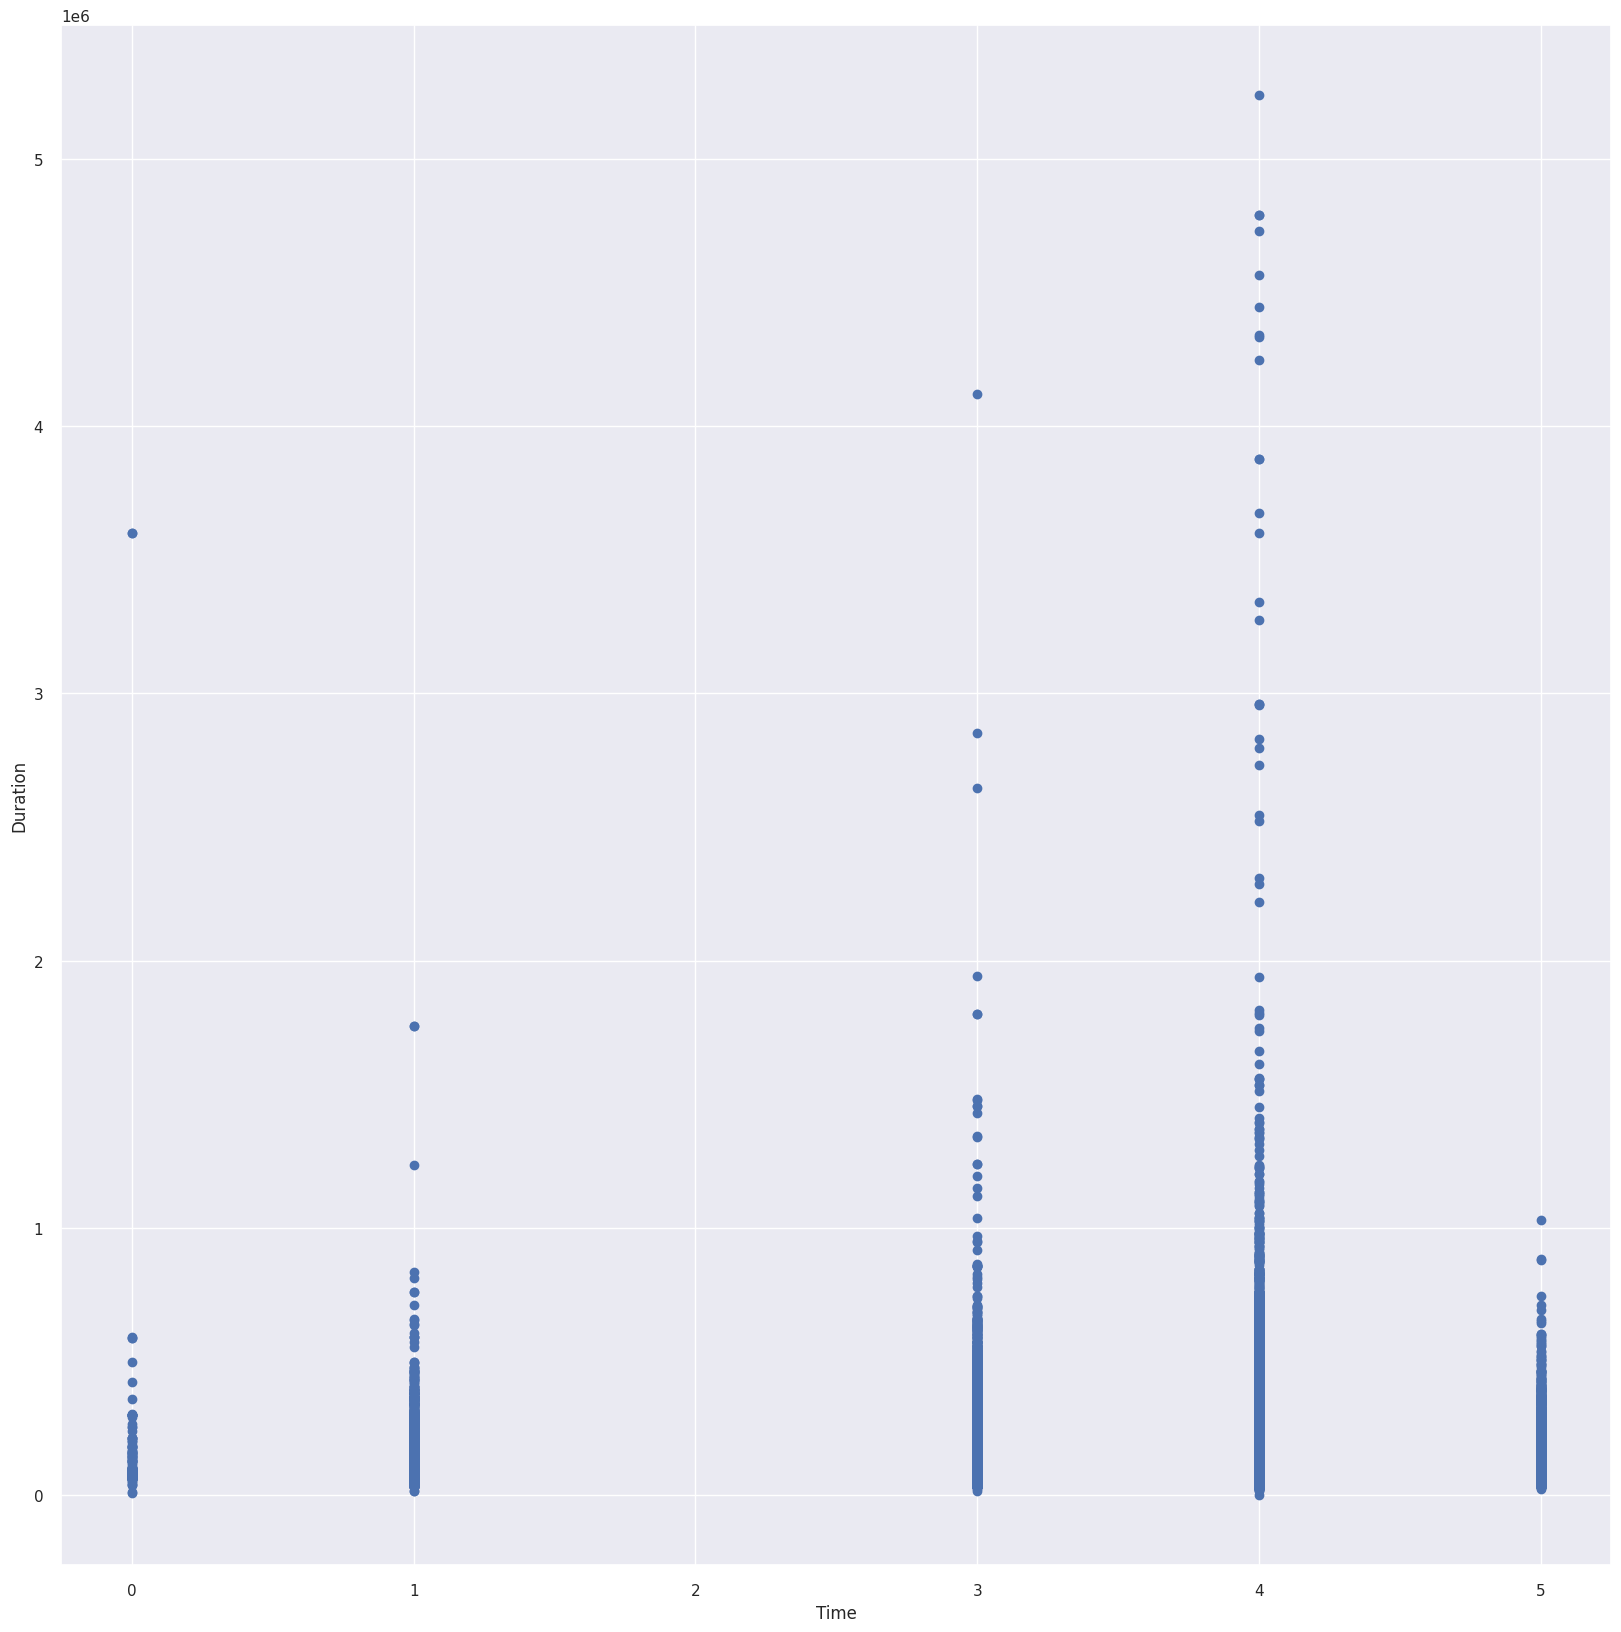

<Figure size 1000x1000 with 0 Axes>

In [26]:
data = pd.read_csv('/content/dataset.csv')
data = data[['time_signature', 'duration_ms']]
data = pd.DataFrame(data)

plt.scatter(df['time_signature'], df['duration_ms'])
plt.xlabel('Time')
plt.ylabel('Duration')
plt.figure(figsize=(10,10))
plt.show()

In [28]:
data = pd.read_csv('/content/dataset.csv')
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic
